# DEV - Polynomial

`numpy` function usage:

```python
pow_i = poly.polyval(u_i, poly.polyfit(u_rpm_i, pow_rpm_i, self.deg))
```

## References

- [Numpy `polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html): Least-squares fit of a polynomial to data.
- [Numpy `polyval`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyval.html): Evaluate a polynomial at points x.

In [16]:
import numpy as np
import numpy.polynomial.polynomial as poly
import random as rnd
import matplotlib.pyplot as plt

SEED = 7

## Quadratic 

- [ ] calcualte `r-square`

```cpp
void _calculate_rsquare() {
    _calculate_ymean();
    for (int i=0; i<_nr_points; i++) _s_sqr += pow(_point_pairs[i][1] - _y_mean, 2);
    for (int i=0; i<_nr_points; i++) _s_res += pow(_point_pairs[i][1] - polyval(_point_pairs[i][0]), 2);
    _r2 = 1 - (_s_sqr / _s_res);
};   
```

In [36]:
N = 10
rnd.seed(SEED)

XY = []     # list[list[tuple]]
X = []      # x-arrays
Y = []      # y-arrays
Yp = []     # predicted values
COEFF = []
R2 = []

for _ in range(N):
    nr_p = rnd.randint(3, 20)  # nr of points
    XY.append([])
    mult = rnd.randint(-100, 100)
    for n in range(nr_p):
        XY[-1].append((rnd.random() * mult, rnd.random() * mult))
    XY[-1].sort(key = lambda p: p[0])
    X.append([p[0] for p in XY[-1]])
    Y.append([p[1] for p in XY[-1]])
    coeff = poly.polyfit(X[-1], Y[-1], 2)
    COEFF.append(list(coeff))
    Yp.append([poly.polyval(x , coeff) for x in X[-1]])
    y_mean = sum(Y[-1]) / len(Y[-1])
    s_sqr = sum([(Y[-1][i] - y_mean)**2 for i in range(len(X[-1]))])
    s_res = sum([(Y[-1][i] - Yp[-1][i])**2 for i in range(len(X[-1]))])
    r2 = 1 - (s_sqr / s_res)
    print(f"sqr: {s_sqr:5f} - res {s_res:5f} - r2 {r2:5f}")
    R2.append([s_sqr, s_res, r2])

sqr: 4731.086649 - res 4611.951383 - r2 -0.025832
sqr: 2343.749103 - res 1206.889042 - r2 -0.941976
sqr: 638.500880 - res 477.974061 - r2 -0.335848
sqr: 2359.899928 - res 1457.145208 - r2 -0.619537
sqr: 2308.326472 - res 1936.494243 - r2 -0.192013
sqr: 1919.025369 - res 1500.899137 - r2 -0.278584
sqr: 97.080507 - res 95.305461 - r2 -0.018625
sqr: 1071.149806 - res 789.795776 - r2 -0.356236
sqr: 12723.753795 - res 10444.681976 - r2 -0.218204
sqr: 8850.156870 - res 7502.751183 - r2 -0.179588


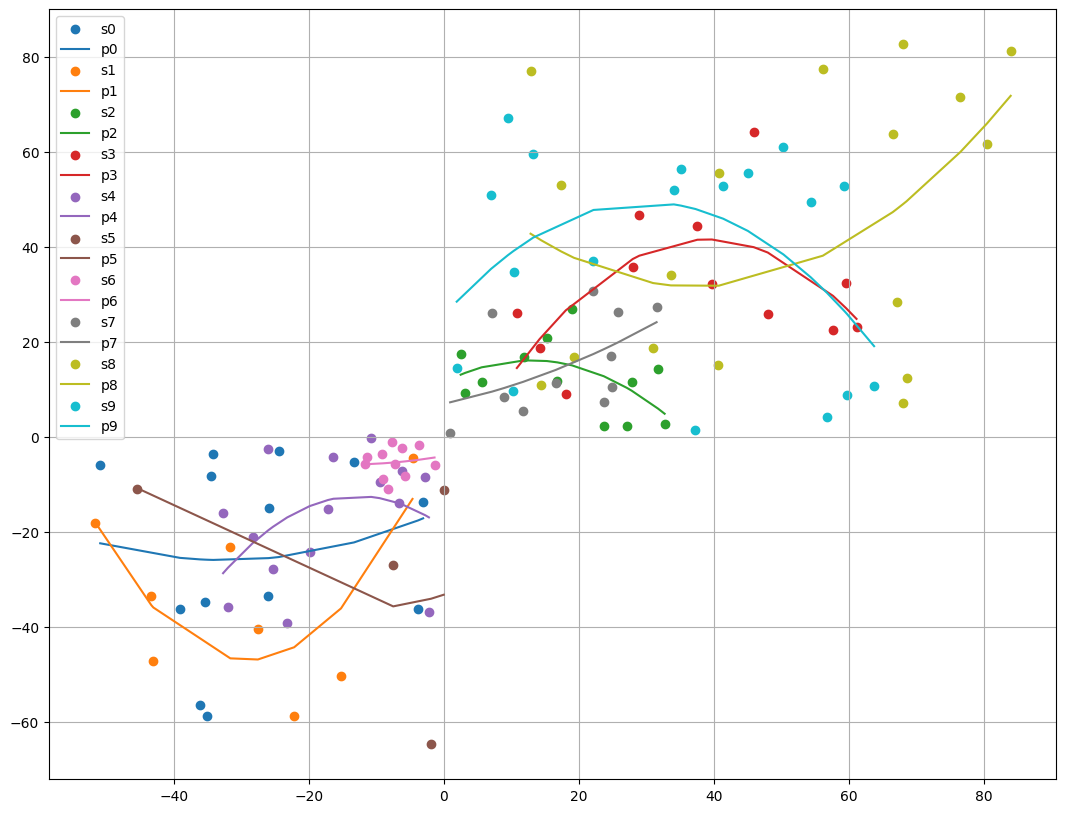

In [28]:
# plots
fig = plt.figure(figsize=(13, 10))
for i in range(len(X)):
    plt.scatter(X[i], Y[i], label=f"s{i}")
    plt.plot(X[i], Yp[i], label=f"p{i}")
plt.grid(which="both")
plt.legend()

## Export

In [39]:
filename_data = {"X": X,
                 "Y": Y,
                 "Yp": Yp,
                 "COEFF": COEFF,
                 "R2": R2
                 }

for fn in filename_data:
    filename = f"{fn}.txt"
    data = filename_data[fn]
    print(f"Writing {filename} ... ", end='')
    with open(filename, 'w') as f:
        for line in data:
            s = ";".join([str(l) for l in line])
            s+= "\n"
            f.write(s)
    print("done!")


Writing X.txt ... done!
Writing Y.txt ... done!
Writing Yp.txt ... done!
Writing COEFF.txt ... done!
Writing R2.txt ... done!
